In [2]:
import pickle
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from collections import Counter, OrderedDict, defaultdict
import random
plt.style.use('ggplot')
%matplotlib inline

In [3]:
random.seed(42)

In [4]:
df = pd.read_pickle('cities_df.p')

In [5]:
df.head()

,Price_Index,0.5 l (16 oz) domestic beer in the supermarket,1 beer in neighbourhood pub (500ml or 1pt.),"1 bottle of red table wine, good quality","1 box of 32 tampons (Tampax, OB, ...)",1 box of antibiotics (12 doses),1 cocktail drink in downtown club,1 kg (2 lb.) of apples,1 kg (2 lb.) of potatoes,1 kg (2 lb.) of tomatoes,...,Monthly rent for a 45 m2 (480 Sqft) furnished studio in NORMAL area,Monthly ticket public transport,Short visit to private Doctor (15 minutes),Standard men's haircut in expat area of the city,"Taxi trip on a business day, basic tariff, 8 km. (5 miles)",Tube of toothpaste,"Utilities 1 month (heating, electricity, gas ...) for 1 person in 45 m2 (480 Sqft) studio","Utilities 1 month (heating, electricity, gas ...) for 2 people in 85m2 flat","Volkswagen Golf 1.4 TSI 150 CV (or equivalent), with no extras, new","iPad Air 2, 64GB"
City,,,,,,,,,,,,,,,,,,,,,
"Zurich, Switzerland",258,2.23,8.0,15.0,9.0,31.0,17.0,3.70,2.80,4.58,...,1668,104,145.0,47.0,38.0,4.17,92,154,28178,633.0
"Geneva, Switzerland",257,2.09,7.0,20.0,8.0,32.0,20.0,4.28,3.13,4.13,...,1778,73,115.0,47.0,37.0,4.04,114,198,26713,544.0
"Grand Cayman, Cayman Islands",255,4.11,6.0,28.0,10.0,25.0,13.0,8.00,4.26,5.84,...,1322,106,149.0,31.0,28.0,4.51,292,353,32956,759.0
"New York City, United States",245,2.93,7.0,17.0,7.0,27.0,15.0,3.71,1.90,4.90,...,2012,119,171.0,26.0,16.0,2.30,126,202,22312,386.0
"Reykjavik, Iceland",240,3.49,10.0,23.0,7.0,20.0,21.0,3.41,2.59,4.13,...,1303,107,42.0,48.0,31.0,3.78,71,116,32704,1004.0


### 6 features have null values. I will drop the features.

In [6]:
df.columns[df.isnull().any()].tolist()

['1 box of antibiotics (12 doses)',
 '1 min. of prepaid mobile tariff (no discounts or plans)',
 '40” flat screen TV',
 'Short visit to private Doctor (15 minutes)',
 'Taxi trip on a business day, basic tariff, 8 km. (5 miles)',
 'iPad Air 2, 64GB']

In [7]:
df1 = df.copy()

In [8]:
df1.dropna(axis = 1, inplace = True)

In [9]:
df2 = df.copy()

In [10]:
df2.dropna(axis=0, inplace=True)

### Train/Test Split, 80/20 split

In [11]:
import math

In [12]:
train_len = math.floor(len(df1) * 0.8) # train length

In [13]:
test_len = len(df1) - train_len

In [14]:
train_len + test_len == len(df) # all rows are accounted for

True

In [15]:
train = df1.sample(n=train_len) # take a sample of length=train_len

In [16]:
cities = df1.index.values

In [17]:
mask = df1.index.isin(train.index)
test = df1[~mask]                # keep the rows from df1 not in the training df

In [18]:
len(train) + len(test)

323

In [19]:
df1.iloc[:,0].values.reshape(-1,1).shape

(323, 1)

In [20]:
X_train, X_test = train.iloc[:,1:].values, test.iloc[:,1:].values          # set X_train and X_test to columns 1:        
y_train, y_test = train.iloc[:,0].values.reshape(-1,1), test.iloc[:,0].values.reshape(-1,1)  # reshape y to get a column vector 

In [21]:
print('X_train:', X_train.shape, 'X_test:', X_test.shape, 'y_train:', y_train.shape, 'y_test:', y_test.shape)

X_train: (258, 46) X_test: (65, 46) y_train: (258, 1) y_test: (65, 1)


In [22]:
lr = LinearRegression() # Initialize the model

In [23]:
lr.fit(X_train,y_train); # "Fit" the model, which means "I want you to learn from my data!"

In [24]:
predicted_y = lr.predict(X_test) # Predict for new data!

In [25]:
lr.score(X_test, y_test) # R^2

0.99051910545747801

In [26]:
len(predicted_y)

65

In [27]:
len(y_test)

65

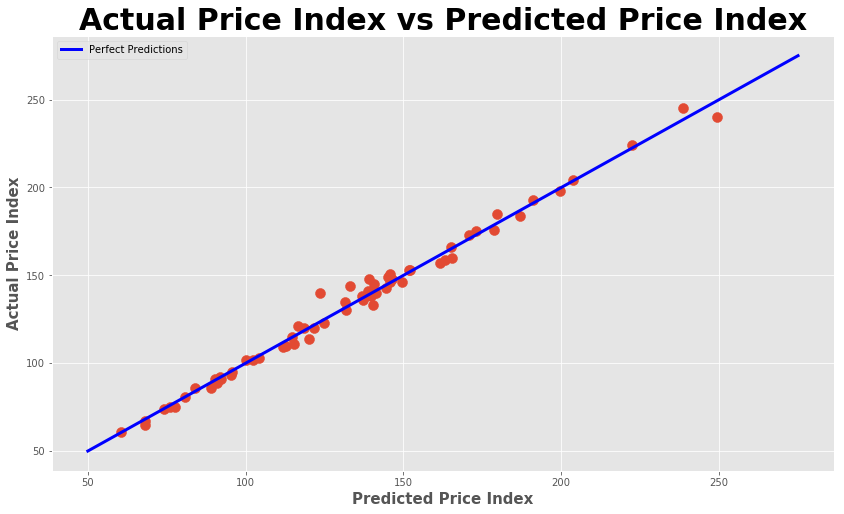

In [28]:
fig = plt.figure(1, figsize = (14, 8))
ax1 = fig.add_subplot(111)
ax1.set_xlabel('Predicted Price Index', fontsize=15, weight='bold')
ax1.set_ylabel('Actual Price Index', fontsize=15, weight='bold')
ax1.set_title('Actual Price Index vs Predicted Price Index', fontsize=30, weight='bold')
ax1.plot([50,275], [50, 275], color = 'b', linewidth = 3, label = 'Perfect Predictions')
ax1.scatter(x = predicted_y , y = y_test, s=100)
ax1.legend();

In [29]:
fig.savefig('all_features.png')   # save the figure to file
plt.close(fig)

In [30]:
len(df2)

311

In [31]:
train1_len = math.floor(len(df1) * 0.8) # train length

In [32]:
test1_len = len(df2) - train_len

In [33]:
train1_len + test_len == len(df) # all rows are accounted for

True

In [34]:
train1 = df2.sample(n=train_len) # take a sample of length=train_len

In [35]:
cities1 = df2.index.values

In [36]:
mask1 = df2.index.isin(train1.index)
test1 = df2.loc[~mask1]                # keep the rows from df1 not in the training df

In [37]:
len(train1) + len(test1)

311

In [38]:
df2.iloc[:,0].values.reshape(-1,1).shape

(311, 1)

In [39]:
X_train1, X_test1 = train1.iloc[:,1:].values, test1.iloc[:,1:].values          # set X_train and X_test to columns 1:        
y_train1, y_test1 = train1.iloc[:,0].values.reshape(-1,1), test1.iloc[:,0].values.reshape(-1,1)  # reshape y to get a column vector 

In [40]:
print('X_train:', X_train1.shape, 'X_test:', X_test1.shape, 'y_train:', y_train1.shape, 'y_test:', y_test1.shape)

X_train: (258, 52) X_test: (53, 52) y_train: (258, 1) y_test: (53, 1)


In [41]:
lr1 = LinearRegression() # Initialize the model

In [42]:
lr1.fit(X_train1,y_train1); # "Fit" the model, which means "I want you to learn from my data!"

In [43]:
predicted_y1 = lr1.predict(X_test1) # Predict for new data!

In [44]:
lr1.score(X_test1, y_test1) # R^2

0.99979135129004293

In [45]:
len(predicted_y1)

53

In [46]:
len(y_test1)

53

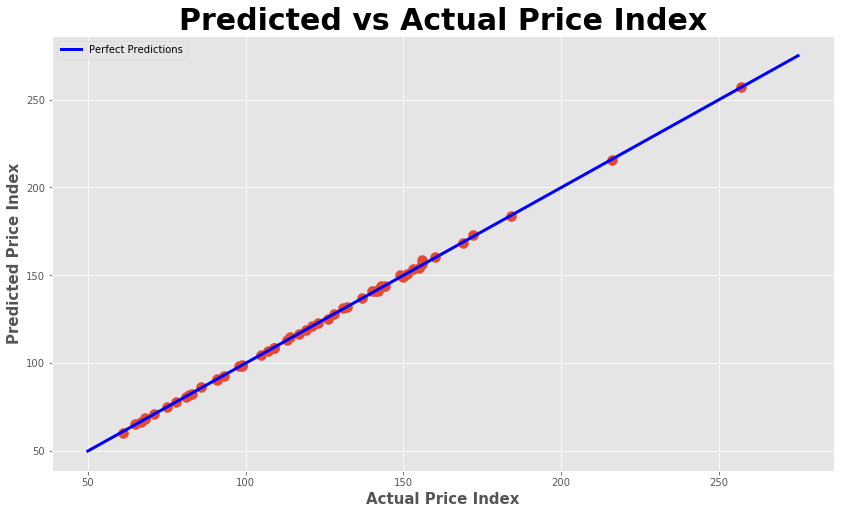

In [47]:
fig = plt.figure(1, figsize = (14, 8))
ax1 = fig.add_subplot(111)
ax1.set_xlabel('Actual Price Index', fontsize=15, weight='bold')
ax1.set_ylabel('Predicted Price Index', fontsize=15, weight='bold')
ax1.set_title('Predicted vs Actual Price Index', fontsize=30, weight='bold')
ax1.plot([50,275], [50, 275], color = 'b', linewidth = 3, label = 'Perfect Predictions')
ax1.scatter(x = y_test1 , y = predicted_y1, s=100)
ax1.legend();

In [48]:
fig.savefig('all_features.png')

In [49]:
cities_d = Counter()
for city in df2.index.values:
    city = city.split(', ')
    cities_d[city[-1]] +=1

### explore cities by country

In [50]:
for k, v in cities_d.items():
    print

In [51]:
ordered = OrderedDict(sorted(cities_d.items(), key=lambda t: t[1], reverse = True))

In [52]:
total = 0
for city, num in ordered.items():
    total += num
total

311

In [56]:
for k,v in ordered.items():
    print(k, v)

United States 70
Brazil 22
United Kingdom 13
Canada 13
India 13
Italy 7
Australia 6
Germany 6
Mexico 6
Switzerland 5
Spain 5
Poland 5
Ireland 4
Russia 4
South Africa 4
Turkey 4
Romania 4
France 3
New Zealand 3
Sweden 3
Netherlands 3
Argentina 3
Ecuador 3
Colombia 3
Ukraine 3
Israel 2
United Arab Emirates 2
Belgium 2
Saudi Arabia 2
China 2
Portugal 2
Greece 2
Cyprus 2
Thailand 2
Croatia 2
Czech Republic 2
Malaysia 2
Serbia 2
Vietnam 2
Cayman Islands 1
Iceland 1
Norway 1
Hong Kong 1
Denmark 1
Singapore 1
Japan 1
Qatar 1
Luxembourg 1
Finland 1
Puerto Rico 1
Austria 1
South Korea 1
Lebanon 1
Uruguay 1
Kuwait 1
Zimbabwe 1
Bahrain 1
Panama 1
Trinidad and Tobago 1
Jordan 1
Slovenia 1
Oman 1
Dominican Republic 1
Mauritius 1
Costa Rica 1
Chile 1
Fiji 1
Taiwan 1
Kenya 1
Latvia 1
Jamaica 1
Estonia 1
Ethiopia 1
Guatemala 1
Lithuania 1
Slovakia 1
Uganda 1
Namibia 1
El Salvador 1
Hungary 1
Tanzania 1
Peru 1
Honduras 1
Montenegro 1
Indonesia 1
Paraguay 1
Morocco 1
Bolivia 1
Philippines 1
Botswana 1
B

In [57]:
lst = []
for city in df2.index.values:
    lst.append(city)

In [58]:
lst.sort()

In [61]:
print(lst[:5])

['Abu Dhabi, United Arab Emirates', 'Addis Ababa, Ethiopia', 'Adelaide, Australia', 'Ahmedabad, India', 'Albuquerque, New Mexico, United States']
